In [70]:
from keras._tf_keras.keras import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Dense, Input, BatchNormalization
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras._tf_keras.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from datetime import datetime
import json

In [71]:
train_path= './Dataset/mnist_train.csv'
test_path= './Dataset/mnist_test.csv'

In [72]:
train= pd.read_csv(train_path)
train= train.to_numpy()


In [73]:
np.random.shuffle(train)
train

array([[9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [74]:
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1, 28, 28, 1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y))) #set() array içindeki benzersiz class örneklerini bulur {1,1,3,4,3,3,2,0} = {1,2,3,4}

    return x,y

In [75]:
x_train, y_train = load_and_preprocess(train_path)
x_test, y_test = load_and_preprocess(test_path)

/var/folders/n8/s31rrs_j13l45k2k_6kxm44w0000gn/T/ipykernel_21016/3612187228.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


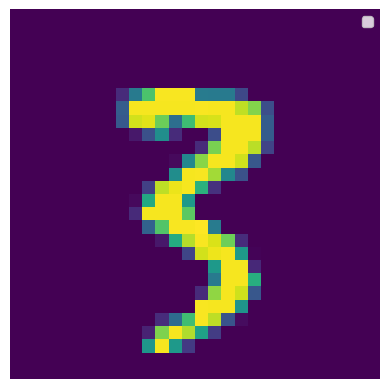

In [76]:
index = 7
vis = x_train.reshape(60000, 28, 28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()


<h1>CNN

In [77]:
NumberOfClasses = y_train.shape[1]

In [80]:
model = Sequential([
    Input(shape=(28,28,1)),

    Conv2D(filters=16, kernel_size=(3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(filters=64, kernel_size=(3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Conv2D(filters=128, kernel_size=(3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(units=256),
    Activation('relu'),
    Dropout(0.5),
    Dense(units= NumberOfClasses),
    Activation('softmax')
    
])

model.compile(loss= 'categorical_crossentropy',
              optimizer= 'adam',
              metrics= ["accuracy"])

In [82]:
hist = model.fit(x=x_train,
                 y=y_train,
                 validation_data=(x_test,y_test),
                 epochs=50,
                 batch_size=1200)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.1135 - val_loss: 5.0853
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.1135 - val_loss: 5.4750
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9879 - loss: 0.0417 - val_accuracy: 0.1142 - val_loss: 4.6239
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9898 - loss: 0.0339 - val_accuracy: 0.1458 - val_loss: 3.3462
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.4062 - val_loss: 1.8581
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9932 - loss: 0.0240 - val_accuracy: 0.7589 - val_loss: 0.6954
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.8180 - val_loss: 0.5346
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9954 - loss: 0.0156 - val_accuracy: 0.

<h3>Save Model :

In [83]:
date = datetime.today()
date = str(date.day)+"-"+str(date.month)+"-"+str(date.year)+"-"+str(date.hour)+":"+str(date.minute)+":"+str(date.second)

model.save_weights('model_saves/model-{}.weights.h5'.format(date))

with open('model_saves/model-{}.json'.format(date),'w') as f:
    json.dump(hist.history, f)

<h3>Load History :

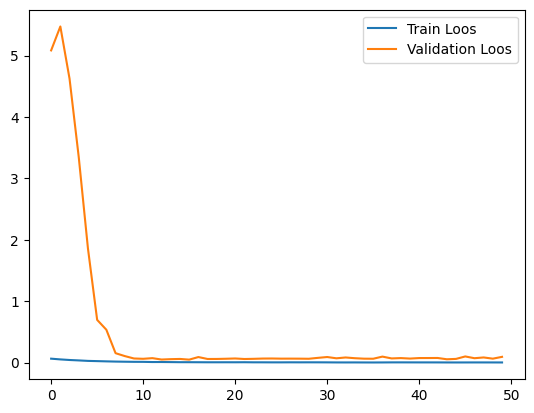

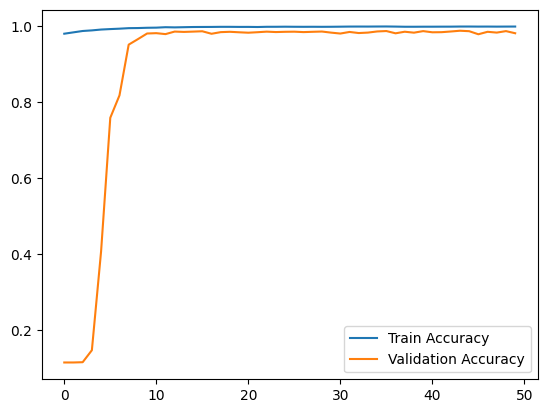

In [84]:
plt.plot(hist.history['loss'], label= 'Train Loos')
plt.plot(hist.history['val_loss'], label= 'Validation Loos')
plt.legend()
plt.figure()
plt.plot(hist.history['accuracy'], label= 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.show()

In [91]:
max(hist.history['val_accuracy'])

0.9884999990463257